# Introduction: Unsupervised Learning

So far in this course, we've considered the *supervised* learning framework. In the supervised framework, we have a matrix of predictive features $\mX \in \R^{n\times p}$ and a vector of targets $\vy \in \R^n$. Our aim is to find a function $f:\R^p\rightarrow \R$ such that $f(\vx) \approx y$; that is, $f$ can be used to make reasonable predictions of a new target $y$ on the basis of new predictors $\vx$.   

**Unsupervised learning** refers to machine learning techniques in which we do **not** have access to any targets $\vy$. Instead, we only have the features $\mX$. In general, the aim of unsupervised learning is not to make predictions, but rather to "find some structure" in the features $\mX$. 


## Dimensionality Reduction

On the other hand, dimensionality reduction is the task of identifying similar or related *features* (columns of $\mX$). This often allows us to identify patterns in the data that we wouldn't be able to spot without algorithmic help. Dimensionality reduction is our topic for this lecture, and we'll discuss clustering in the next one. 

# Matrix Factorization Methods

There are many approaches for dimensionality reduction. Here, we're going to consider *matrix factorization methods*. Broadly speaking, in matrix factorization, we aim to write $\mX \approx \mU \mW$ for some matrices $\mU$ and $\mW$, usually subject to some constraints on these matrices. One constraint is direct: if $\mX \in \R^{n \times p}$, then we must have $\mU \in \R^{n \times k}$ and $\mW \in \R^{k\times p}$ for some value of $k$. We sometimes think of $k$ as a *latent dimension* for the problem, and aim to find a value of $k \ll p$. The smaller $k$ is, the more we have simplified our data, but small values of $k$ may cause us to lose a lot of interesting structure that we might have wanted to capture. 

To specify a matrix factorization model, we need to make three main choices: 

1. What does "$\approx$"  mean when we write  $\mX \approx \mU \mW$?
2. What choice of $k$ will we use? 
3. What other requirements will we place on $\mU$ and $\mW$? 

# Principal Component Analysis

Principal component analysis (PCA) is a classical method in statistics for dimensionality reduction. Let's answer each of the three questions above for PCA. 

## Approximation: the Frobenius Norm

In PCA, $\mX \approx \mU \mW$ means that $\norm{\mX - \mU \mW}_F$ is small, where $\norm{\cdot}_F$ is the *Frobenius norm*. The Frobenius norm of a matrix is just the square root of the sum of its squared entries: 
$$
\norm{\mA}_F = \sqrt{\sum_{i = 1}^n \sum_{j = 1}^n a_{ij}^2}\;. 
$$

## Choice of $k$

For PCA, we leave the choice of $k$ to the user. There are heuristic ways for choosing $k$, but we won't discuss them in this course. 

## Constraints on $\mU$ and $\mW$

In PCA, we place a certain special structure on the factorization matrices $\mU$ and $\mW$ that help us to interpret them: 

- $\mW \in \R^{k \times p}$ 
- $\mU = \mX \mW^T$. Note that this ensures that $\mU \in \R^{n\times k}$. 
- $\mW \mW^T = \mI$. 

These assumptions can be derived statistically from the problem of finding the subspace (spanned by $\mW$) that maximizes the variance of the data when projected onto that subspace. 

## The PCA Model

With these choices, the PCA optimization problem becomes: 

$$
\begin{aligned}
\hat{\mW} =& \argmin_{\mW \in \R^{n\times k}} \norm{\mX - \mX\mW^T\mW }_{F} \\ 
          &\text{Such that }  \mW\mW^T = \mI
\end{aligned}
$$

Now, we could aim to solve this problem with gradient descent (in the entries of $\mW$) or some similar approach. This, however, is more complicated than needed. As it turns out, some nice theory from linear algebra gives us a formula for finding $\mW$ in terms of the eigenvalues of the matrix $\mX^T\mX$. In particular: [Take a moment to convince yourself that $\hat{\mW}$ has dimensions $k \times p$ as required.]{.aside}

$$
\hat{\mW} = \left[\begin{matrix} 
              - & \vv_1 & - \\ 
              - & \vv_2 & - \\
              \vdots & \vdots & \vdots \\ 
              - & \vv_k & - \\ 
\end{matrix}\right]
$$

where $\vv_i$ is the $i$th eigenvector of $\mX^T\mX$. 

## Implementing PCA

Let's go ahead and implement PCA. We'll do this using a term-document matrix that I derived from Lewis Caroll's famous book *Alice's Adventures in Wonderland*. Each row of the data corresponds to a chapter of the book, and each column corresponds to a word that may appear in that chapter: 

In [1]:
#| code-fold: true

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import nltk
from nltk.corpus import gutenberg
# nltk.download('gutenberg') # need to run once
from sklearn.feature_extraction.text import CountVectorizer

s = gutenberg.raw("carroll-alice.txt")
chapters = s.split("CHAPTER")[1:]
df = pd.DataFrame({
    "chapter" : range(1, len(chapters) + 1),
    "text" : chapters
})
df

,chapter,text
0,1,I. Down the Rabbit-Hole\n\nAlice was beginnin...
1,2,II. The Pool of Tears\n\n'Curiouser and curio...
2,3,III. A Caucus-Race and a Long Tale\n\nThey we...
3,4,IV. The Rabbit Sends in a Little Bill\n\nIt w...
4,5,V. Advice from a Caterpillar\n\nThe Caterpill...
5,6,VI. Pig and Pepper\n\nFor a minute or two she...
6,7,VII. A Mad Tea-Party\n\nThere was a table set...
7,8,VIII. The Queen's Croquet-Ground\n\nA large r...
8,9,IX. The Mock Turtle's Story\n\n'You can't thi...
9,10,X. The Lobster Quadrille\n\nThe Mock Turtle s...


In [2]:
vec = CountVectorizer(max_df = 0.5, min_df = 0, stop_words = "english")

counts = vec.fit_transform(df['text'])
counts = counts.toarray()
M = pd.DataFrame(counts, columns = vec.get_feature_names_out())
M

,_i_,abide,able,absence,absurd,acceptance,accident,accidentally,account,accounting,...,year,years,yelled,yelp,yer,yesterday,young,youth,zealand,zigzag
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,4,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,6,0,1
5,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
9,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0


In [6]:
X = counts
np.sqrt((X**2).sum())

160.9409829720199

Now we're ready to implement PCA. Because there is an explicit solution in terms of the eigenvalues of a matrix, our implementation can be very short. [This is a *very slow* implementation of PCA; faster methods involve numerical methods for computing *singular values*.]{.aside}

In [8]:
def pca(M, k): 
    X  = np.array(M)
    ev = np.linalg.eigh(X.T@X)
    W  = ev[1][:,-k:].T
    return X@W.T, W # U, W

Here's PCA in action: 

In [9]:
k = 4
U, W = pca(M, k)

In [12]:
U.shape, W.shape

((12, 4), (4, 2146))

## Interpreting PCA

Ok, so why did we do this? Both the matrices $\mU$ and $\mW$ can be used to give us information about the structure of the text. In the context of text analysis, we usually interpret $\mU$ and $\mW$ as expressing information about some latent *topics*. The $j$ th column of $\mW$ gives us a weight for each term in the text; this tells us how present each term is in the topic. The following function can be used to inspect the top words in each topic:  

In [13]:
def top_words_pca(M, W, component, num_words):
    orders = np.argsort(np.abs(W), axis = 1)
    important_words = np.array(M.columns)[orders]
    return important_words[component][-num_words:]

for i in range(k):
  print(f"topic {i}: {top_words_pca(M, W, i, 10)}")

topic 0: ['cats' 'jury' 'court' 'baby' 'mad' 'footman' 'caterpillar' 'mouse' 'cat'
 'king']
topic 1: ['gryphon' 'soldiers' 'tea' 'hare' 'march' 'cat' 'dormouse' 'king'
 'hatter' 'queen']
topic 2: ['tea' 'queen' 'hare' 'march' 'gryphon' 'king' 'mock' 'turtle' 'dormouse'
 'hatter']
topic 3: ['march' 'course' 'soup' 'dormouse' 'hatter' 'king' 'queen' 'gryphon'
 'mock' 'turtle']


On the other hand, the matrix $\mU = \mX \mW^T$ tells us about how present each of the $k$ topics are in each of the documents (in this case, chapters of the book). We can visualize the topic weight in each chapter over time: 

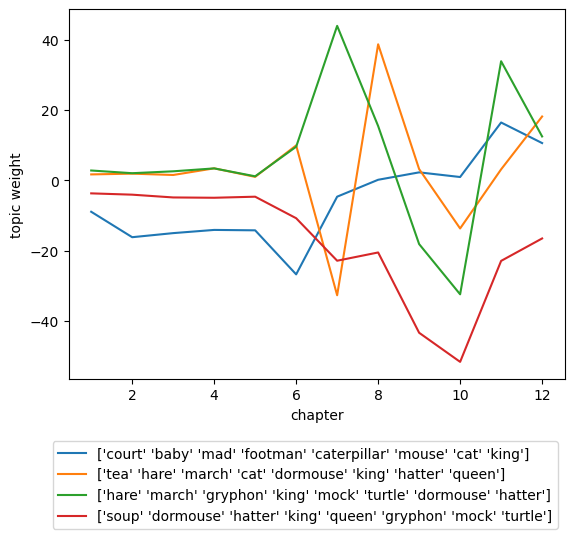

In [14]:
fig, ax = plt.subplots(1)

for i in range(k):
    ax.plot(np.arange(1, M.shape[0]+1), U[:,i], label = top_words_pca(M, W, i, 8))

ax.set(xlabel = "chapter", ylabel = "topic weight")

ax.legend(bbox_to_anchor=(1, -.15))

## Limitations of PCA 

PCA is a fantastically powerful algorithm in a wide variety of settings, but it does have some important limitations. In this case, it can be difficult for us to interpret the results of PCA because some of the topics can be "negatively involved" in a chapter. That is, the words in that topic are "especially absent" from the chapter. This is confusing at best. So, we have a mismatch between what this specific matrix factorization method does and our interpretability needs. This is a very common situation, and is one of the most frequent motivators of new methods. [For more on PCA, including some settings in which it is more effective, see [this section](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html) of the *Python Data Science Handbook* by Jake VanderPlas.]{.aside}

# Nonnegative Matrix Factorization

Nonnegative matrix factorization (NMF) is an algorithm that is explicitly designed to compensate for this problem. In NMF, we instead solve a different matrix factorization problem. The core of the problem is:[I call this the "core" of the problem because there are also usually other terms minimized that correspond to different kinds of regularization.]{.aside} 

$$
\begin{aligned}
\hat{\mU}, \hat{\mW} =& \argmin_{\mU \in \R^{n \times k}, \mW \in \R^{k\times p}} \norm{\mX - \mU\mW}_{F} \\ 
          &\text{Such that }  \mU, \mW \geq \vzero \; . 
\end{aligned}
$$

That is, both the matrices $\mU$ and $\mW$ are required to be nonnegative in all their entries. This ensures that the results will be more interpretable, at the cost of making it much harder to actually solve the problem. Implementations of NMF usually require modified relatives of gradient descent in order to run. 

Let's see NMF in action on our data: 

In [15]:
from sklearn.decomposition import NMF
model = NMF(n_components = k)
model.fit(M)

NMF(n_components=4)

As before, we can extract the most important words for each topic: 

In [16]:
def top_words_NMF(M, model, component, num_words):
    orders = np.argsort(model.components_, axis = 1)
    important_words = np.array(M.columns)[orders]
    return important_words[component][-num_words:]

for i in range(k):
  print(top_words_NMF(M, model, i, 10))

['whiting' 'course' 'join' 'sea' 'beautiful' 'dance' 'soup' 'gryphon'
 'mock' 'turtle']
['asleep' 'treacle' 'table' 'king' 'twinkle' 'tea' 'hare' 'march'
 'dormouse' 'hatter']
['hedgehog' 'game' 'majesty' 'gardeners' 'court' 'soldiers' 'jury' 'cat'
 'king' 'queen']
['cats' 'dinah' 'eat' 'baby' 'mad' 'dodo' 'footman' 'caterpillar' 'cat'
 'mouse']


And plot the role of each topic in each chapter: 

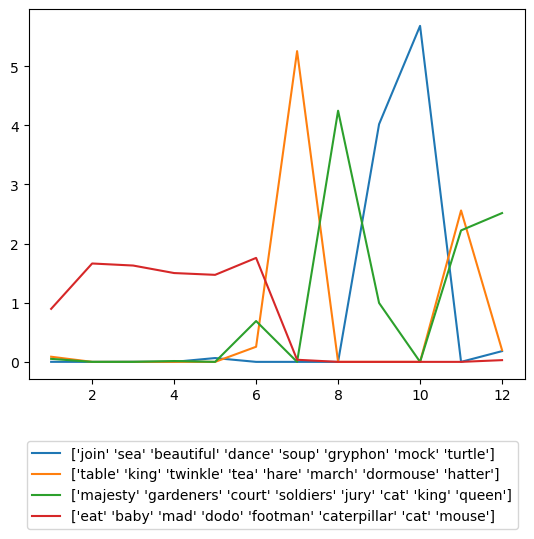

In [17]:
U = model.transform(M)
fig, ax = plt.subplots(1)

for i in range(4):
    ax.plot(df['chapter'], U[:,i], label = top_words_NMF(M, model, i, 8))

ax.legend(bbox_to_anchor=(1, -.15))

This is much more interpretable! We can easily see several major features of the plot of the novel, including the tea party with the March Hare, the Mad Hatter, and the Dormouse (Chapter 7), the crocquet game in the court of the Queen of Hearts (Chapter 8), the appearance of the Mock Turtle and the Lobster (Chapters 9 and 10), and the reappearance of many characters in Chapter 11.